# 2. Praproses Dataset CSE-CIC-IDS2018

## Import Library & Load Dataset

#### 1. Import Library

In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import re

from numpy import array
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Menampilkan lebih banyak kolom dan baris pada Dataset
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

#### 2. Tipe dataset yang digunakan

In [2]:
tipe_dataset = {'Dst Port': 'uint32', 'Protocol': 'uint8', 'Timestamp': 'object', 'Flow Duration': 'int64', 'Tot Fwd Pkts': 'uint32', 'Tot Bwd Pkts': 'uint32', 'TotLen Fwd Pkts': 'uint32', 'TotLen Bwd Pkts': 'uint32', 'Fwd Pkt Len Max': 'uint16', 'Fwd Pkt Len Min': 'uint16', 'Fwd Pkt Len Mean': 'float32', 'Fwd Pkt Len Std': 'float32', 'Bwd Pkt Len Max': 'uint16', 'Bwd Pkt Len Min': 'uint16', 'Bwd Pkt Len Mean': 'float32', 'Bwd Pkt Len Std': 'float32', 'Flow Byts/s': 'float64', 'Flow Pkts/s': 'float64', 'Flow IAT Mean': 'float32', 'Flow IAT Std': 'float32',
 'Flow IAT Max': 'int64', 'Flow IAT Min': 'int64', 'Fwd IAT Tot': 'int64', 'Fwd IAT Mean': 'float32', 'Fwd IAT Std': 'float32', 'Fwd IAT Max': 'int64', 'Fwd IAT Min': 'int64', 'Bwd IAT Tot': 'uint32', 'Bwd IAT Mean': 'float32', 'Bwd IAT Std': 'float32', 'Bwd IAT Max': 'uint32', 'Bwd IAT Min': 'uint32', 'Fwd PSH Flags': 'uint8', 'Bwd PSH Flags': 'uint8', 'Fwd URG Flags': 'uint8', 'Bwd URG Flags': 'uint8', 'Fwd Header Len': 'uint32', 'Bwd Header Len': 'uint32', 'Fwd Pkts/s': 'float32', 'Bwd Pkts/s': 'float32',
 'Pkt Len Min': 'uint16', 'Pkt Len Max': 'uint16', 'Pkt Len Mean': 'float32', 'Pkt Len Std': 'float32', 'Pkt Len Var': 'float32', 'FIN Flag Cnt': 'uint8', 'SYN Flag Cnt': 'uint8', 'RST Flag Cnt': 'uint8', 'PSH Flag Cnt': 'uint8', 'ACK Flag Cnt': 'uint8', 'URG Flag Cnt': 'uint8', 'CWE Flag Count': 'uint8', 'ECE Flag Cnt': 'uint8', 'Down/Up Ratio': 'uint16', 'Pkt Size Avg': 'float32', 'Fwd Seg Size Avg': 'float32', 'Bwd Seg Size Avg': 'float32', 'Fwd Byts/b Avg': 'uint8', 'Fwd Pkts/b Avg': 'uint8', 'Fwd Blk Rate Avg': 'uint8',
 'Bwd Byts/b Avg': 'uint8', 'Bwd Pkts/b Avg': 'uint8', 'Bwd Blk Rate Avg': 'uint8', 'Subflow Fwd Pkts': 'uint32', 'Subflow Fwd Byts': 'uint32', 'Subflow Bwd Pkts': 'uint32', 'Subflow Bwd Byts': 'uint32', 'Init Fwd Win Byts': 'int32', 'Init Bwd Win Byts': 'int32', 'Fwd Act Data Pkts': 'uint32', 'Fwd Seg Size Min': 'uint8', 'Active Mean': 'float32', 'Active Std': 'float32', 'Active Max': 'uint32', 'Active Min': 'uint32', 'Idle Mean': 'float32', 'Idle Std': 'float32', 'Idle Max': 'uint64', 'Idle Min': 'uint64', 'Label': 'category'}


#### 3. 'Load' Dataset CIC-IDS2018

In [3]:
# Load Data
m_load = time.time()
dataset = pd.read_csv("G:\\Universitas Indonesia\\Rancangan Paper\\Dataset CSE-CIC-IDS2018-AWS\\CIC2018\\CIC2018.csv", dtype = tipe_dataset, low_memory=False)
s_load = time.time()
print ('Waktu load dataset : ', s_load - m_load)

Waktu load dataset :  205.05813789367676


In [4]:
# ubah nama fitur(kolom) dataset ke 'lowercase'
df_columns = dataset.columns
df_fitur = [kata.lower() for kata in df_columns]
df_columns = [kata.translate(str.maketrans(' /', '__')) for kata in df_fitur]
dataset.columns = df_columns

print ('Konversi nama fitur menjadi huruf kecil')
print ('=======================================')
print (df_columns)

Konversi nama fitur menjadi huruf kecil
['dst_port', 'protocol', 'timestamp', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s', 'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt', 'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg', 'fwd_seg_size_avg', 'bwd_seg_size_avg', 'fwd_byts_b_avg', 'fwd_

In [5]:
# ubah nama kelas target(label) ke 'lowercase'
df_label = dataset['label'].unique()
df_target = [kata.lower() for kata in df_label]
df_target = [kata.translate(str.maketrans(' /�-', '____')) for kata in df_target]
dict_target = dict(zip(df_label, df_target))

dataset['label'] = dataset['label'].map(lambda x: dict_target[x])
dataset['label'].value_counts()

benign                      13484708
ddos_attack_hoic              686012
ddos_attacks_loic_http        576191
dos_attacks_hulk              461912
bot                           286191
ftp_bruteforce                193360
ssh_bruteforce                187589
infilteration                 161934
dos_attacks_slowhttptest      139890
dos_attacks_goldeneye          41508
dos_attacks_slowloris          10990
ddos_attack_loic_udp            1730
brute_force__web                 611
brute_force__xss                 230
sql_injection                     87
Name: label, dtype: int64

In [6]:
print ('fitur timestamp sebelum di konversi')
print ('===================================')
dataset['timestamp'].head()

fitur timestamp sebelum di konversi


0    02/03/2018 08:47:38
1    02/03/2018 08:47:38
2    02/03/2018 08:47:40
3    02/03/2018 08:47:40
4    02/03/2018 08:47:41
Name: timestamp, dtype: object

In [7]:
# konversi waktu pada fitur 'timestamp' ke 'unix time'
timestamp = pd.to_datetime(dataset['timestamp'])
dataset['timestamp'] = (timestamp - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [8]:
print ("fitur 'timestamp' setelah di konversi ke 'unix time'")
print ('====================================================')
dataset['timestamp'].head()

fitur 'timestamp' setelah di konversi ke 'unix time'


0    1517647658
1    1517647658
2    1517647660
3    1517647660
4    1517647661
Name: timestamp, dtype: int64

## Praproses Data

#### 1. Hapus sampel dengan fitur Protokol '0'

,protocol,Persentase(%)
6,11800335,72.693750
17,4194295,25.838167
0,238313,1.468083


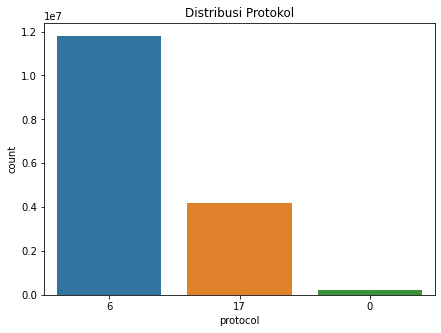

In [9]:
 # distribusi fitur 'protocol'
protokol = pd.DataFrame(dataset['protocol'].value_counts())
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='protocol', data=dataset, order = protokol.index, ax=ax)
plt.title('Distribusi Protokol')

protokol['Persentase(%)'] = protokol / protokol.sum()*100
protokol

In [10]:
# pisah dataset protokol '0' dan protool '17 & 6'
data_proto_0 = dataset.loc[dataset['protocol'] == 0]
dataset = dataset.loc[dataset['protocol'] != 0]

In [11]:
# distribusi fitur protokol '0' pada kelas target
data_proto_0['label'].value_counts()

benign                      235779
infilteration                 2255
bot                            258
brute_force__web                21
brute_force__xss                 0
ddos_attack_hoic                 0
ddos_attack_loic_udp             0
ddos_attacks_loic_http           0
dos_attacks_goldeneye            0
dos_attacks_hulk                 0
dos_attacks_slowhttptest         0
dos_attacks_slowloris            0
ftp_bruteforce                   0
sql_injection                    0
ssh_bruteforce                   0
Name: label, dtype: int64

In [12]:
#################################################
# nilai pada masing - masing fitur berdasarkan  #
# sampel dari fitur 'protocol' yang bernilai 0  #
#################################################

std = data_proto_0.describe().loc['std']
fitur_tidak_ada_varian = std[std == 0.0].index
fitur_tidak_memiliki_varian = pd.DataFrame({'fitur': std[std == 0.0].index})
varian_nilai = []
for i in fitur_tidak_ada_varian:
    varian_nilai.append(data_proto_0[i].value_counts())

jumlah_varian = pd.DataFrame(pd.concat(varian_nilai), 
                              columns = ['Jumlah']).rename_axis('Hanya memiliki nilai').reset_index()
fitur_ = pd.concat([fitur_tidak_memiliki_varian, jumlah_varian], axis=1)
print (fitur_)

                fitur  Hanya memiliki nilai  Jumlah
0            dst_port                   0.0  238313
1            protocol                   0.0  238313
2     totlen_fwd_pkts                   0.0  238313
3     totlen_bwd_pkts                   0.0  238313
4     fwd_pkt_len_max                   0.0  238313
5     fwd_pkt_len_min                   0.0  238313
6    fwd_pkt_len_mean                   0.0  238313
7     fwd_pkt_len_std                   0.0  238313
8     bwd_pkt_len_max                   0.0  238313
9     bwd_pkt_len_min                   0.0  238313
10   bwd_pkt_len_mean                   0.0  238313
11    bwd_pkt_len_std                   0.0  238313
12        flow_byts_s                   0.0  238312
13      fwd_psh_flags                   0.0  238313
14      bwd_psh_flags                   0.0  238313
15      fwd_urg_flags                   0.0  238313
16      bwd_urg_flags                   0.0  238313
17     fwd_header_len                   0.0  238313
18     bwd_h

#### 2. Mengganti nilai 'inf' dengan 'NaN'

In [13]:
# Menghitung 'NaN' dalam dataset
dataset.isnull().sum().to_numpy()

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,   59720,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0, 8190014, 8190014, 8190014, 8190014],
      dtype=int64)

In [14]:
# Mengganti nilai 'inf' dengan 'NaN'
dataset = dataset.replace([np.inf, -np.inf], np.nan)

# Menghitung ulang 'NaN' dalam dataset
dataset.isnull().sum().to_numpy()

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,   95759,   95759,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0, 8190014, 8190014, 8190014, 8190014],
      dtype=int64)

In [15]:
# fitur yang memiliki 'NaN'
Fitur_NaN = dataset.columns[dataset.isnull().any()].tolist()
Fitur_NaN

['flow_byts_s', 'flow_pkts_s', 'flow_id', 'src_ip', 'src_port', 'dst_ip']

#### 3. Menghapus fitur yang memiliki nilai NaN > 50%

In [16]:
# Mengecek kolom yang berisi nilai NaN
Fitur_NaN = dataset.columns[dataset.isnull().any()].tolist()

# Cek total jumlah dan persentase nilai NaN
print ("Jumlah 'NaN' dan persentase 'NaN'")
print ('=================================')
Persentase_NaN = pd.DataFrame({'Jumlah NaN': dataset[Fitur_NaN].isnull().sum(),
                               'Persentase NaN %':dataset[Fitur_NaN].isnull().sum()/ len(dataset.index) * 100})
Persentase_NaN = Persentase_NaN.reset_index().rename({'index':'Fitur'}, axis = 'columns')
Persentase_NaN.index += 1
print (Persentase_NaN)

Jumlah 'NaN' dan persentase 'NaN'
         Fitur  Jumlah NaN  Persentase NaN %
1  flow_byts_s       95759          0.598695
2  flow_pkts_s       95759          0.598695
3      flow_id     8190014         51.204773
4       src_ip     8190014         51.204773
5     src_port     8190014         51.204773
6       dst_ip     8190014         51.204773


In [17]:
# Hapus fitur yang memiliki nilai NaN > 50%
dataset = dataset.drop(columns=['flow_id', 'src_ip', 'dst_ip', 'src_port'], errors='ignore')

# Mengecek kolom yang berisi nilai NaN
Fitur_NaN = dataset.columns[dataset.isnull().any()].tolist()

# Cek total jumlah dan persentase nilai NaN
print ("Sisa jumlah 'NaN' dan persentase 'NaN' dalam dataset")
print ('====================================================')
Persentase_NaN = pd.DataFrame({'Jumlah NaN': dataset[Fitur_NaN].isnull().sum(),
                               'Persentase NaN':dataset[Fitur_NaN].isnull().sum()/ len(dataset.index) * 100})
Persentase_NaN = Persentase_NaN.reset_index().rename({'index':'Fitur'}, axis = 'columns')
Persentase_NaN.index += 1
print (Persentase_NaN)

Sisa jumlah 'NaN' dan persentase 'NaN' dalam dataset
         Fitur  Jumlah NaN  Persentase NaN
1  flow_byts_s       95759        0.598695
2  flow_pkts_s       95759        0.598695


#### 4. Hapus sampel dengan fitur 'flow_byts_s' dan 'flow_pkts_s' yang bernilai 'NaN'

In [18]:
# Menghapus sampel data yang memiliki 'NaN'
dataset = dataset.dropna()

In [19]:
# Menghitung ulang 'NaN' dalam dataset
dataset.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### 5. Hapus fitur yang hanya memiliki satu nilai/tidak memiliki varians

In [20]:
# Cari fitur yang memiliki satu nilai atau tidak memiliki varians

std = dataset.describe().loc['std']
fitur_tidak_ada_varian = std[std == 0.0].index
fitur_tidak_memiliki_varian = pd.DataFrame({'fitur': fitur_tidak_ada_varian})
varian_nilai = []
for i in fitur_tidak_ada_varian:
    varian_nilai.append(dataset[i].value_counts())

jumlah_varian = pd.DataFrame(pd.concat(varian_nilai), 
                columns = ['Jumlah sampel']).rename_axis('Hanya memiliki satu nilai').reset_index()
fitur_ = pd.concat([fitur_tidak_memiliki_varian, jumlah_varian], axis=1)
fitur_.index += 1
print ("Fitur tidak memiliki varian nilai")
print ('=================================')
print (fitur_)
print ('')
print (f"Jumlah fitur pada dataset : {dataset.shape[1]-1} fitur")

Fitur tidak memiliki varian nilai
              fitur  Hanya memiliki satu nilai  Jumlah sampel
1     bwd_psh_flags                          0       15898871
2     bwd_urg_flags                          0       15898871
3    fwd_byts_b_avg                          0       15898871
4    fwd_pkts_b_avg                          0       15898871
5  fwd_blk_rate_avg                          0       15898871
6    bwd_byts_b_avg                          0       15898871
7    bwd_pkts_b_avg                          0       15898871
8  bwd_blk_rate_avg                          0       15898871

Jumlah fitur pada dataset : 79 fitur


In [21]:
# Hapus fitur yang tidak memiliki varians
dataset = dataset.drop(fitur_tidak_ada_varian, axis=1)
print (f"Sisa jumlah fitur pada dataset : {dataset.shape[1]-1} fitur")

Sisa jumlah fitur pada dataset : 71 fitur


#### 6. Hapus salah satu fitur antara 2 fitur yang memiliki nilai  Koefisien Korelasi 1

In [22]:
# koefisien korelasi pearson
df_koef_kor_pearson = dataset.corr()
# Fungsi koefisien korelasi bernilai 1
def Koefisien_korelasi_1(df):
    fitur_hapus = set()
    kolom = df.columns
    for i in range(df.shape[0]):
        for j in range(0, i+1):
            fitur_hapus.add((kolom[i], kolom[j]))         
    korelasi_fitur = df.unstack().drop(fitur_hapus).sort_values(ascending=False)
    korelasi_fitur = korelasi_fitur[korelasi_fitur >= 0.99999]
    korelasi_fitur = pd.DataFrame({'koefisien_korelasi':korelasi_fitur}).reset_index()
    korelasi_fitur = korelasi_fitur.rename(columns = {korelasi_fitur.columns[0]:'fitur_kolom_i',
                                                      korelasi_fitur.columns[1]:'fitur_kolom_j'})
    return korelasi_fitur
# koefisien korelasi bernilai 1
Koefisien_korelasi_1 = Koefisien_korelasi_1(df_koef_kor_pearson)
Koefisien_korelasi_1.index += 1
print ('Fitur yang memiliki koefisien korelasi 1')
print ('========================================')
print (Koefisien_korelasi_1); print (''); print (f"Jumlah fitur pada dataset : {dataset.shape[1]-1} fitur")

Fitur yang memiliki koefisien korelasi 1
      fitur_kolom_i     fitur_kolom_j  koefisien_korelasi
1     fwd_urg_flags    cwe_flag_count                 1.0
2      tot_fwd_pkts  subflow_fwd_pkts                 1.0
3   totlen_fwd_pkts  subflow_fwd_byts                 1.0
4     fwd_psh_flags      syn_flag_cnt                 1.0
5      tot_bwd_pkts  subflow_bwd_pkts                 1.0
6  bwd_pkt_len_mean  bwd_seg_size_avg                 1.0
7  fwd_pkt_len_mean  fwd_seg_size_avg                 1.0
8   totlen_bwd_pkts  subflow_bwd_byts                 1.0

Jumlah fitur pada dataset : 71 fitur


In [23]:
# Hapus salah satu fitur dari 2 fitur yang memiliki nilai Koefisien Korelasi 1
dataset  = dataset.drop(Koefisien_korelasi_1['fitur_kolom_j'],axis=1)
print (f"Sisa jumlah fitur pada dataset : {dataset.shape[1]-1} fitur")

Sisa jumlah fitur pada dataset : 63 fitur


#### 7. 'save' dataset baru

In [74]:
# simpan dataset baru dengan nama CSE_CIC_IDS2018_Praproses
dataset.to_csv("G:\\Universitas Indonesia\\Rancangan Paper\\Dataset CSE-CIC-IDS2018-AWS\\CIC2018\\CSE_CIC_IDS2018_Praproses.csv", index=False)